# `Importing Libraries`

In [1]:
# import main libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# `Exploratory Data Analysis`

In [2]:
# reading the data .csv file
path = os.path.join(os.getcwd(), 'data.csv')
data = pd.read_csv(path)

# Read data as DataFrame
data = pd.DataFrame(data)

# Show the first 5 rows of DF
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Show information about Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* > `Comment: It seems that: The Data set has 569 rows and 33 columns and all columns are numerical columns except the 'Diagnosis' is a categorical column. Furthermore, All columns doesn't contain null values except the 'Unnamed: 32' has only null value (useless column).`

In [4]:
# show some statistical measures
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
# check nulls
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Check the distribution of target column "diagnosis"
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

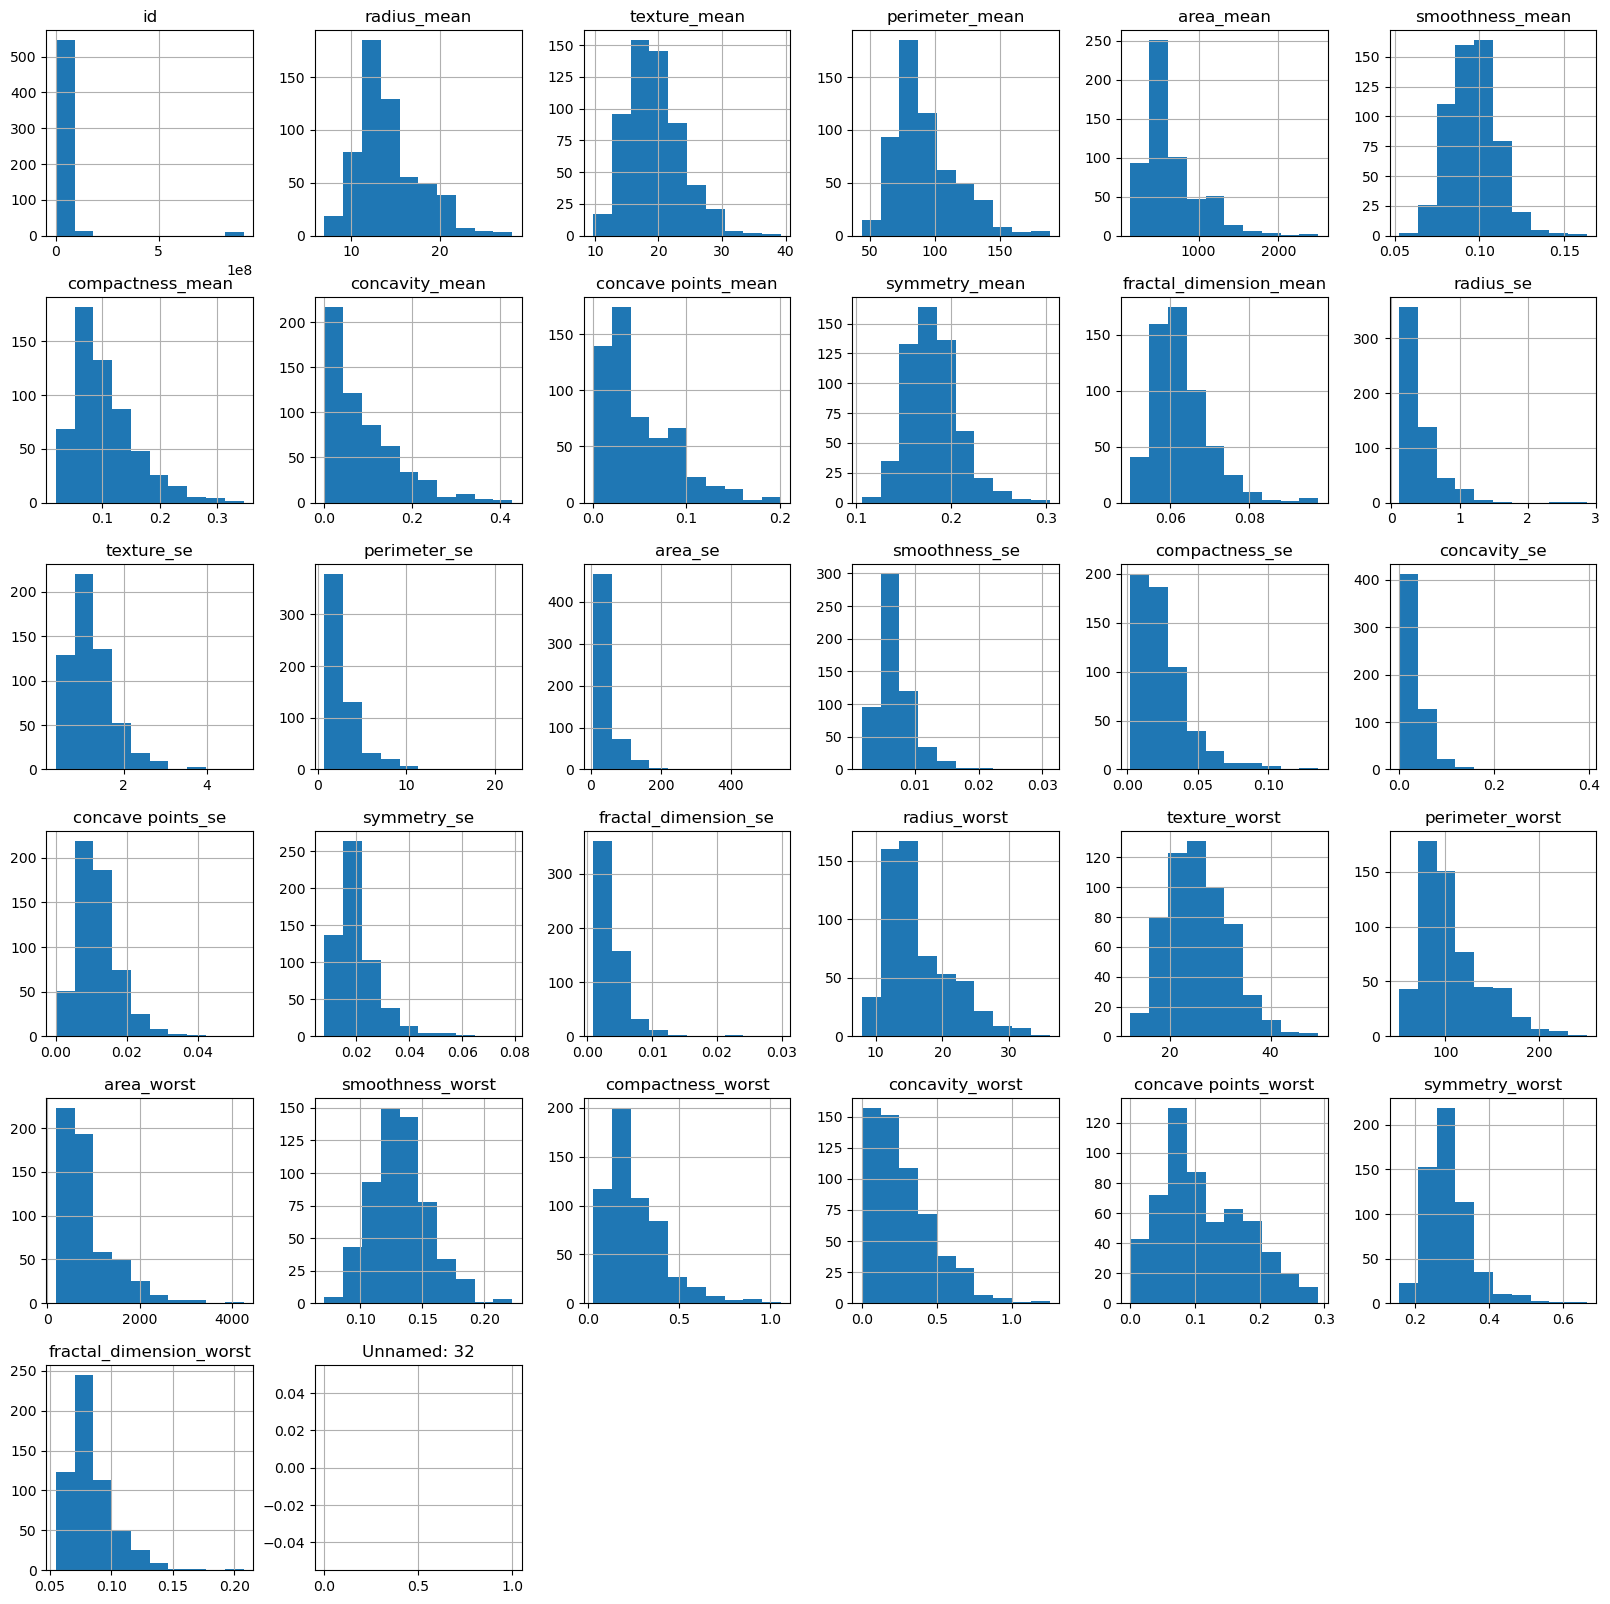

In [7]:
# Check the distribution for each column by using histogram
data.hist(figsize=(20, 20))
plt.show()

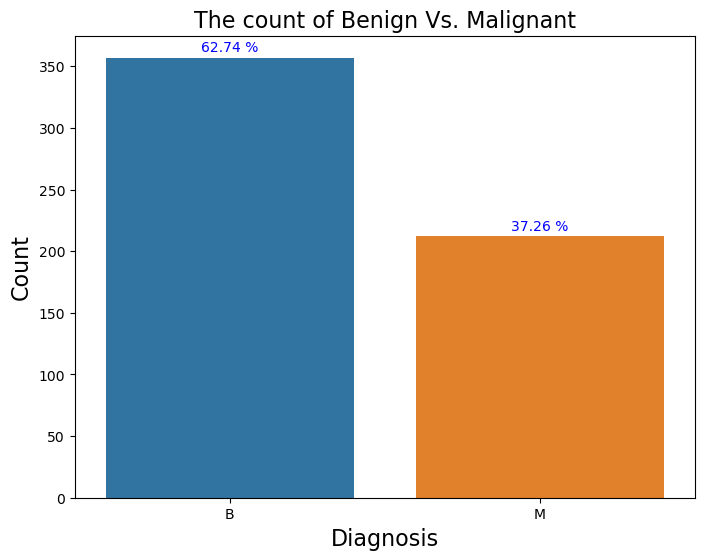

In [8]:
# plot the percentage of target column values
replicates = data['diagnosis'].value_counts()

# plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data, order=replicates.index)
plt.title('The count of Benign Vs. Malignant', fontsize=16, c='k')
plt.xlabel('Diagnosis', fontsize=16, c='k')
plt.ylabel('Count', fontsize=16, c='k')

for i in range (len(replicates)):
    each_count = replicates.values[i]
    each_text = f'{each_count*100/len(data):.2f} %'
    plt.text(x=i, y=each_count+5, s=each_text,ha='center', c='b')

plt.show()

* > `Comment: It seems that the percentage of Benign (62.74%) is almost twice than the percentage of Malignant (37.26%).`

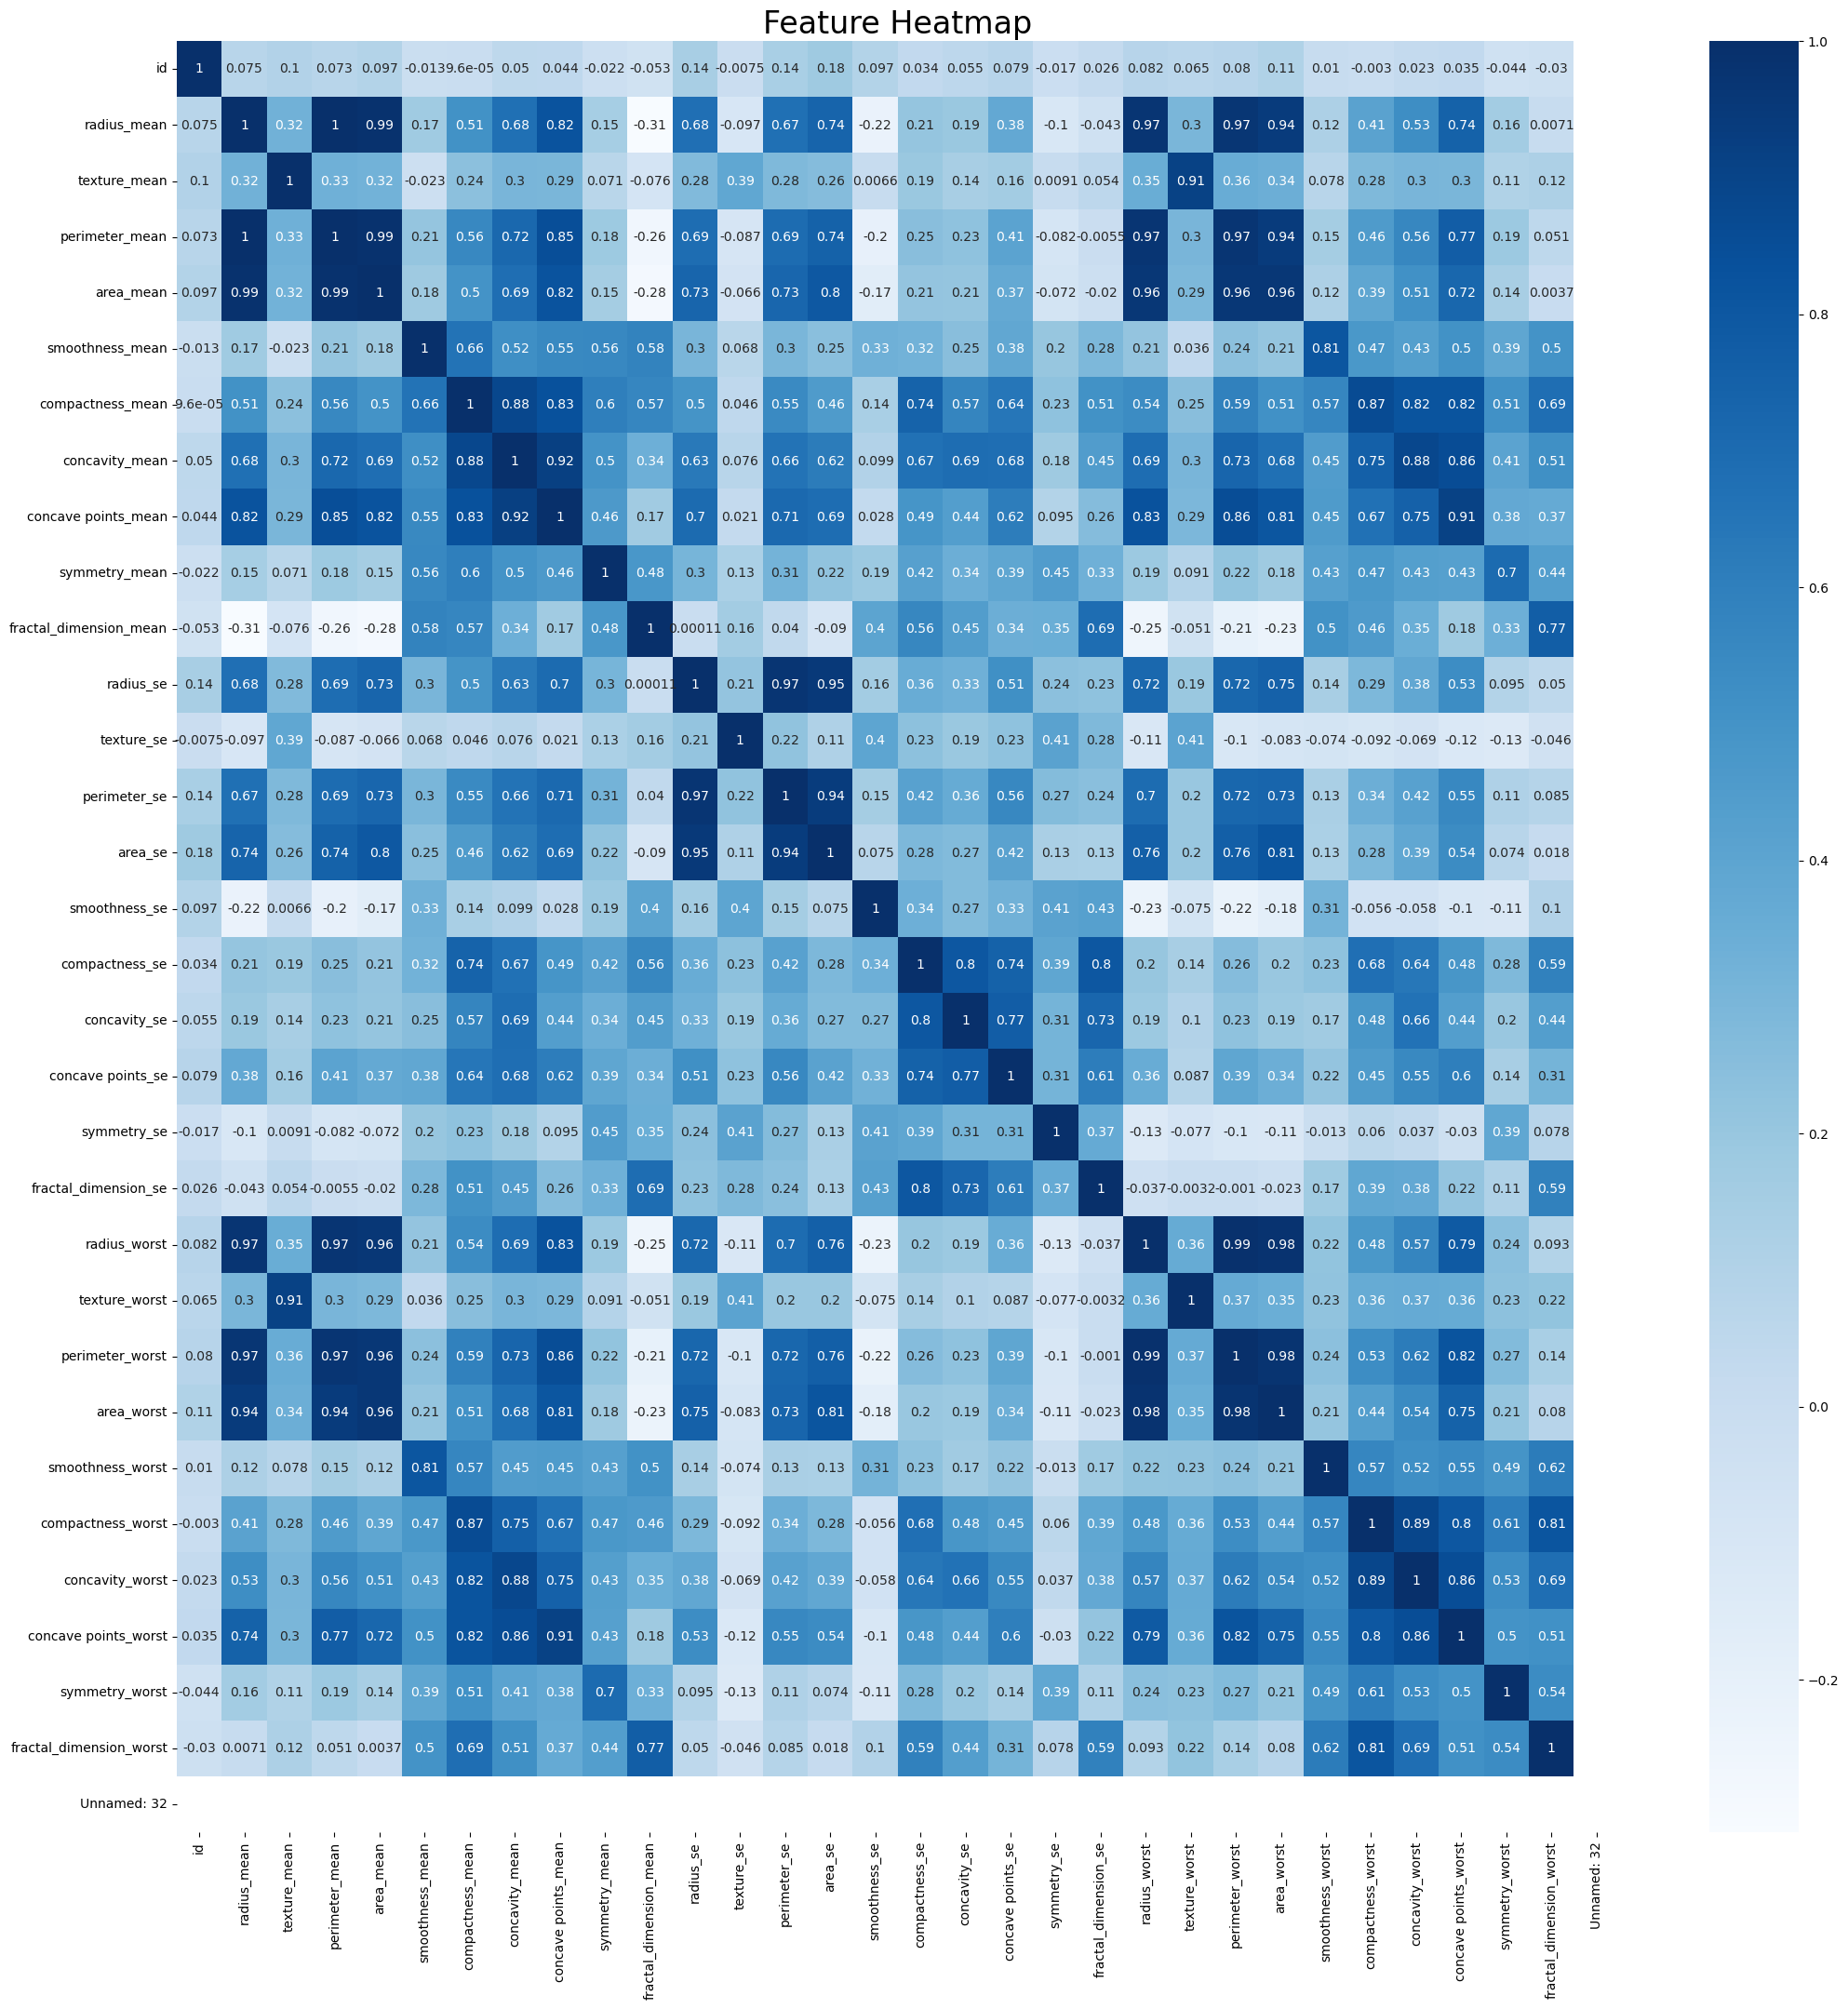

In [9]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Feature Heatmap', c='k', fontsize=24)
plt.show()

# `Data Preprocessing`

In [10]:
# identify features and drop other useless columns (Feature Extraction)
X = data.drop(columns=['diagnosis', 'Unnamed: 32', 'id'], axis=1)
y = data['diagnosis']

In [11]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# making the train and test data converge faster and put all features in the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # train
X_test_scaled = scaler.transform(X_test)   # test

# `Building Model`
### `Logistic Regression`

In [13]:
# using Logistic Regression for classification
logist_clf = LogisticRegression(tol=0.0001, C=2, max_iter=1000, random_state=42)
logist_clf.fit(X_train_scaled, y_train)

LogisticRegression(C=2, max_iter=1000, random_state=42)

In [14]:
# Evaluate the model using accuracy
logist_acc = cross_val_score(estimator=logist_clf, X=X_train_scaled, y=y_train, scoring='accuracy', cv=5)
logist_acc = logist_acc.mean()

In [15]:
# check the accuracy of this model using (cross_val_score)
y_pred_clf = cross_val_predict(estimator=logist_clf, X=X_train_scaled, y=y_train, cv=5, method='predict')

print(f'after prediction using LogsiticRegression --> {accuracy_score(y_train, y_pred_clf):0.3f}')

after prediction using LogsiticRegression --> 0.976


In [17]:
y_pred = logist_clf.predict(X_test_scaled)
print(f'after prediction using LogsiticRegression --> {accuracy_score(y_test, y_pred):0.3f}')

after prediction using LogsiticRegression --> 0.974


In [18]:
# Display classification report
target_labels = ['B', 'M']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



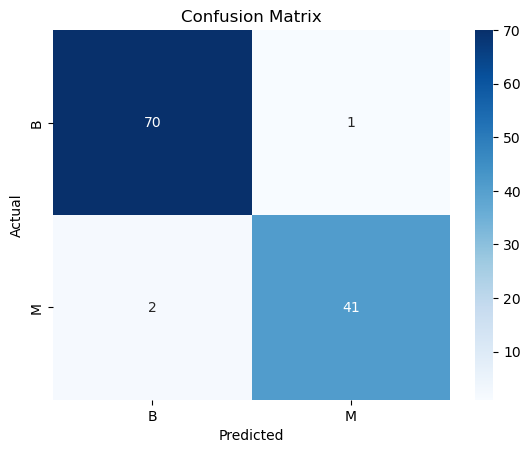

In [19]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

* > `Comment: from the report, it seemed that there is only 3 incorrect prediction out of 114 instances.`